<p align="center">
  <strong style="font-size: 22px;">Universidad Torcuato Di Tella</strong><br>
  <span style="font-size:18px;">Time Series Analysis</span><br><br>
  <em>Profesor: Martín Sola</em><br>
  <em>Auxiliar: Inés Kishkill</em><br><br>
  <strong>Autor: Paola Nuñez</strong>
</p>


# Ejercicio 1

Derive las funciones teóricas de autocorrelación y autocorrelación parcial de los siguientes procesos estocásticos: AR(1), MA(1), AR(2), MA(2) y ARMA(1,1).

> **Explique cómo puede utilizar estas funciones para identificar el proceso estocástico que sigue una serie.**

### Introducción

#### Definición de AR, MA y ARMA
> AR(p)
$$
X_t = \mu + \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + \dots + \alpha_p X_{t-p} + \varepsilon_t
$$

> MA(q):
$$
X_t = \mu + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q} + \varepsilon_t
$$

> ARMA (p,q)

$$
X_t = \mu + \alpha_1 X_{t-1} + \dots + \alpha_1 X_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_q \varepsilon_{t-q}+ \varepsilon_t
$$

#### Definición de ACF y PACF

Definimos la función de autocorrelación (ACF) y autocorrelación parcial (PACF).

> ACF

$$ \rho_j = ACF(j) = corr(X_t, X_{t-j})$$
$$ \rho_j = \frac{cov(x_t, x_{t-j})}{\sqrt{Var(x_t)} \sqrt{Var(x_{t-j})}} $$

Asumiendo que el proceso es estacionario,

$$ Var(x_t) = Var(x_{t-j}) $$

Entonces, la ACF queda como:

$$\rho_j = \frac{cov(x_t, x_{t-j})}{Var(x_t)}$$

Notación: $cov(x_t, x_{t-j}) = \gamma_j$. Luego, con $j=0$, la varianza de todo $x_j$ es $var(x_t) = \gamma_0$. Consecuentemente,

$$ ACF(j)=\frac{\gamma_j}{\gamma_0}$$

*¿Cómo se ve una ACF para un MA vs un AR?*

- **MA(q)**

$ cov(x_t, x_{t-j}) = 0 $ para los lags (j) que son mayores a q (el orden del MA). Entonces, $ACF(j)$ tambien va a ser 0 para los $j>q$. 

Ejemplo: MA(2)

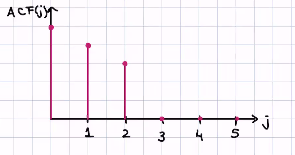

- **AR(p)**

$ cov(x_t, x_{t-j}) \ne 0 $, entonces:

$$ ACF(j) = \frac{cov(x_t, x_{t-j})}{Var(x_t)}  \ne 0 \quad \forall j$$

En particular, si el AR es estacionario, la $ACF(j)$ va a decaer geométricamente a 0. 

Ejemplo: AR(p) cualquiera.

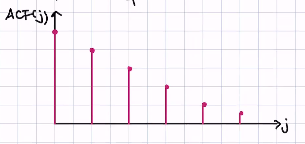

Pueden alternar entre positivo y negativo, lo importante es que converjan a cero. 

> PACF 
$$ PACF(j) = \phi_j = \frac{\partial x_t}{\partial x_{t-j}} $$ 

**Hamilton**: es el coeficiente que acompaña a $x_{t-j}$ en una regresión de $x_t$ sobre todos sus primeros lags hasta $x_{t-j}$.

**Idea**: AR(2)

$$x_t = \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + \varepsilon_t$$

Si cambia $x_{t-2}$ hay dos efectos:
1. Efecto directo: $\alpha_2$
2. Efecto indirecto: $\alpha_1^2$

La ACF captura ambos efectos, mientras que la PACF solo el directo. 

*¿Cómo se ve una PACF para un MA vs un AR?*

- AR(p)

La $PACF(j)$ va a ser $\ne 0$ hasta el lag p. A partir de $p$, se hace 0. 

Ejemplo: AR(3)

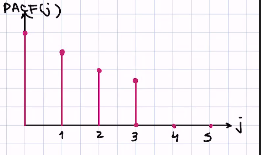

Notar que la primera barrita es $\frac{\partial x_t}{ \partial x_{t-0}} = 1$.

- MA(q):

La PACF(j) es siempre $ \ne 0$. Idea: un MA(q) invertible (para q=1, pedimos que $|\theta_1| <1$) vale que hay una representación $\to AR(+\infty)$. Es decir, *nunca va a llegar el último lag*. Con los MA(q), la PACF(j) va a decaer geométricamente a 0, pero nunca lo va a tocar. 

> Conclusión: La ACF nos sirve para identificar a los MA y a su orden. Para los AR, es siempre $\ne 0$. La PACF nos sirve para identificar a los AR y a su orden. Para los MA es siempre $\ne 0$. 

### Resolución 
Calculemos las ACF y PACF para $MA(1)$ y $AR(1)$. 

#### AR(1):

Recordamos la formula de la ACF:
$$ACF(j) = \frac{cov(x_t, x_{t-j})}{var(x_t)}$$

Notar que para resolver siempre vamos a asumir que el proceso que sigue $x_t$ es estacionario debilmente. Esto va a implicar que cada vez que medimos la esperanza y la matriz de varianza-covarianzas vamos a ver que para momentos equidistantes de la variable $x_t$ (por ejemplo, para t y t+1 y para t+1 y t+2, donde siempre hay un período de diferencia) vamos a encontrar que la covarianza es constante. Es decir, 

$$ cov(x_{t}, x_{t+k}) = cov(x_{t+c}, x_{t+k+c}) $$

Para todo k y para todo c. Ahora, calculemos $Var(x_t) = var(\alpha_1 x_{t-1} + \varepsilon_t)$.

Usando que $x_{t-1}$ es ortogonal al error,

$$ Var(x_t) =var(\alpha_1 x_{t-1}) + var(\varepsilon_t)$$

Luego,
$$ Var(x_t) = \alpha_1^2 var(x_{t-1}) + \sigma_e^2$$

Suponiendo que $x_t$ es estacionario entonces $var(x_t) = var(x_{t-j}) = \gamma_0$.

$$\gamma_0 = \alpha_1^2 \gamma_0 + \sigma_e^2$$
$$\gamma_0 (1-\alpha_1^2) = \sigma_e^2$$
$$ \gamma_0 = \frac{\sigma_e^2}{1-\alpha_1^2} = var(x_t)$$

- $cov(x_t,x_{t-j})$

Para j=1, $cov(x_t, x_{t-1}) = cov( \alpha_1 x_{t-1}+ \epsilon_t, x_{t-1})$

Por independencia con los errores:

$$ = cov(\alpha_! x_{t-1}, x_{t-1}) + cov(\epsilon_t, x_{t-1})$$ 

Cómo es estacionario $var(x_{t-1}) = var(x_t) = \gamma_0$. Entonces,

$$ cov(x_t, x_{t-1}) = \alpha_1 \gamma_0$$

Para j=2 es idéntico y se llega a:

$$cov(x_t, x_{t-2}) = \alpha_1^2 \gamma_0$$

En general,
$$cov(x_t, x_{t-j}) = \alpha_1^j \gamma_0$$

Entonces, 

$$ ACF(j) = \frac{cov(x_t, x_{t-j})}{Var(x_t)} = \frac{\alpha_1^j \gamma_0}{\gamma_0} = \alpha_1^j $$

> Notar entonces que es siempre diferente de cero y si $|\alpha_1|<1$ (proceso estacionario), va a decaer geométricamente a 0. 

- Ahora veamos el PACF

Recordamos el proceso:

$$x_t = \alpha_1 x_{t-1} + \varepsilon_t$$

Usamos la derivación del PACF:
$$\frac{\partial x_t}{\partial x_{t-j}}=\alpha_j$$

Siendo $\alpha_j = 0 \quad \forall j>1$

> Resumiendo. Para un proceso AR(1) la ACF decae geométricamente a cero y la PACF es distinta de cero para el orden del AR y luego es cero para el resto de lags. 

#### MA(1)

Recordamos el proceso:

$$ x_t = \theta_1 \epsilon_{t-1} + \epsilon_t$$

Para calcular la ACF necesitamos la varianza y covarianza respecto de los lags:

$$var(x_t) = var(\theta_1 \epsilon_{t-1} + \epsilon_t)$$

Usando ortogonalidad de los errores y por enunciado:

$$\theta_1^2 var( \epsilon_{t-1}) + var(\epsilon_t) = \theta_1^2 \sigma_\epsilon^2 + \sigma_\epsilon^2 = (1+\theta_1^2) \sigma_\epsilon^2$$

Luego,

$$ cov(x_t, x_{t-j}) = cov (\theta_1 \epsilon_{t-1} + \epsilon_t, \theta_1 \epsilon_{t-j-1} + \epsilon_{t-j})$$

Por independencia de errores, tenemos que:

- Para $j=1$

$$ cov(x_t, x_{t-j}) = \theta_1 \sigma_\epsilon^2$$

- Para $j>1$
$$ cov(x_t, x_{t-j}) = 0$$

Entonces, la ACF es:
\begin{cases}
\frac{\theta_1 \sigma_\epsilon^2}{(1+\theta_1^2) \sigma_\epsilon^2} = \frac{\theta_1}{(1+\theta_1^2) } \text{ if j = 1} \\
0 \quad \quad \quad \quad  \quad \quad \text{ if j > 1}
\end{cases}

La PACF tiene una forma cerrada mas complicada, pero como ya sabemos va a decaer geométricamente a cero pero nunca va a ser nula. 

> El resto del ejercicio tiene la misma lógica, ver las soluciones. Destaco un resultado, si el proceso no es un AR o un MA puro (es un ARMA), entonces tanto la ACF como la PACF decaen geométricamente y no me sirven para identificar el orden de ninguno de los procesos


# Ejercicio 2

> **Explique en qué consiste la metodología de Box-Jenkins.**

Es un método que nos permite **identificar** si una serie sigue un proceso del estilo ARIMA o ARMA. 

Pasos:
1. **Verificar** que la serie es estacionaria. En caso contrario, realizar transformaciones para que sea un supuesto creíble (ejemplos: tomar logaritmos y diferenciar, o tomar primeras diferencias )
2. Analizar el **correlograma** de la serie. Hacer un *educated guess* sobre el orden del proceso, partiendo del número de lags más chico posible (para reducir overfitting). Notar que vamos a usar los resultados del ejercicio anterior, si el proceso es AR, vamos a mirar el último palito distinto de cero (significativamente) de la ACF, mientras que si es MA miramos el último de la PACF. Esto no vale para ARMA...
3. Una vez elegidos p y q (los ordenes), **estiman** los parámetros del modelo. 
4. Verifican si nuestro modelo es efectivamente un buen *fit*. Es decir, los residuos se comportan como ruido blanco. 

Para elegir entre dos o más modelos que logran "limpiar" los residuos, usamos **criterios de información**. 

# Ejercicio 3

## Enunciado
Recuerde la definición del $R^2$:

$$
R^2 = 1 - \frac{\sum_{t=1}^{T} \hat{\varepsilon}_t^2}{\sum_{t=1}^{T} (y_t - \bar{y})^2} = 1- \frac{RSS}{TSS}
$$

Donde:
- $RSS$ es la suma de los errores al cuadrado.
- $TSS$ es la suma total de cuadrados.

1. Para un estimador consistente de los parámetros del proceso $\{y_t\}_{t=-\infty}^{+\infty}$, el 
   $$
   \lim_{T \to \infty} R^2 = 1 - \frac{\sigma_{\varepsilon}^2}{\gamma_0}.
   $$
   Calcule esta expresión cuando $\{y_t\}$ sigue un AR(1) y cuando sigue un MA(1).

2. Argumente que comparar los $R^2$ de los modelos no puede ser un mecanismo válido para la selección de modelos.

3. Proponga algún criterio de selección de modelos. De acuerdo a estos, ¿cuándo un modelo es preferido a otro?

## Resolución
1) Convergencia en proba:

$$R^2 \to 1- \frac{\sigma_e^2}{\gamma_0}$$

- AR(1) Calculamos en el ej 1, que $\gamma_0 = \frac{\sigma_e^2}{1-\alpha_1^2}$
- MA(1) $\gamma_0 = \sigma_e^2(1+\theta_1^2)$

Entonces,

- AR(1) 

$$ R^2 \to 1- (1-\alpha_1^2)$$

- MA(1)

$$ R^2 \to 1- \frac{1}{1+\theta_1^2}$$

2) Notar que, por tener distinta convergencia en probabilidad, los $R^2$ de los modelos NO son comparables. Además tener un $R^2$ no implica que el modelo que tenemos sea bueno prediciendo (puedo tener muchos parametros y la prediccion in sample sea buena, pero no out of sample)

3) Criterios de información, Akaike y Schwartz son los más usados:
- AIC = $log(\hat{\sigma}^2) + \frac{2 (p+q)}{T}$
- BIC = $log(\hat{\sigma}^2) + \frac{2 log(T) (p+q)}{T}$

El primer término penaliza por volatilidad mientras que el segundo por complejidad. Vamos a elegir el modelo que tenga menor criterio de información. 

# Ejercicio 4

Acá vamos a tener que levantar una serie de datos y hacer el ejercicio de ver la ACF y la PACF, para luego aplicar la metodología de Box y Jenkins para verificar conjeturas. 

Dado que, en principio, no tengo la serie pero lo que me importa es hacer los tests, voy a simularlos de acuerdo a lo que las respuestas sugieren. 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(123) 

# Seteo numero de observaciones
n = 1000  

# Diccionario de especificaciones de modelos (parámetros AR y MA)
model_specs = {
    'y1': {'AR': [1.5, -0.75], 'MA': []}, # AR(2)
    'y2': {'AR': [1.2, -0.5], 'MA': []},  # AR(2)
    'y3': {'AR': [], 'MA': [0.7]},        # MA(1)
    'y4': {'AR': [], 'MA': [0.9, -0.3]},  # MA(2)
    'y5': {'AR': [0.6], 'MA': [0.6]}      # ARMA(1,1)
}

def generate_series(specs, n):

    """
    Generación de series de tiempo basadas en especificaciones ARMA:
    1. Utilizamos np.r_ para concatenar los coeficientes AR y MA.
    2. La clase ArmaProcess requiere que el polinomio característico del proceso AR tenga la forma:
       (1 - φ₁L - φ₂L² - ...), por lo que invertimos el signo de los coeficientes AR.
       Por esta razón, la variable local `ar` se define como [1, -coef1, -coef2, ...].
    3. Para el polinomio MA, la clase ArmaProcess espera la forma:
       (1 + θ₁L + θ₂L² + ...), por lo que los coeficientes MA se mantienen con su signo original.
    4. Creamos un objeto de la clase ArmaProcess con los polinomios AR y MA definidos.
       Este objeto incluye el método `generate_sample`, que genera una serie de tiempo
       del tamaño especificado (en este caso, n=200).
    """

    ar = np.r_[1, -np.array(specs['AR'])]  # signo invertido por convención  
    ma = np.r_[1, np.array(specs['MA'])]
    arma_process = sm.tsa.ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

series = pd.DataFrame({name: generate_series(spec, n) for name, spec in model_specs.items()})

print(series.head())


         y1        y2        y3        y4        y5
0 -1.085631 -0.748827 -1.774224 -0.450599 -0.471276
1 -0.631100 -0.330998 -2.443334  0.204052  0.518542
2  0.150551  0.695366  0.255293  1.857555  0.582345
3 -0.807143  0.000558  1.628417  1.745307 -0.240401
4 -1.902228  0.127885 -0.917641  2.337233 -1.042675


Ahora que tenemos el dataset, vamos a plotear la ACF y PACF de cada serie, y correr el test J para ver que modelo fittea mejor. 

Para eso usamos los siguientes métodos de la clase:
1. plot_acf_pacf: para plotear.
2. suggest_model_order: para decidir si es AR, MA, o ARMA y de que orden de forma heuristica
3. correlograma_tabla: para ver la tabla como sale en Eviews


## Variable y1

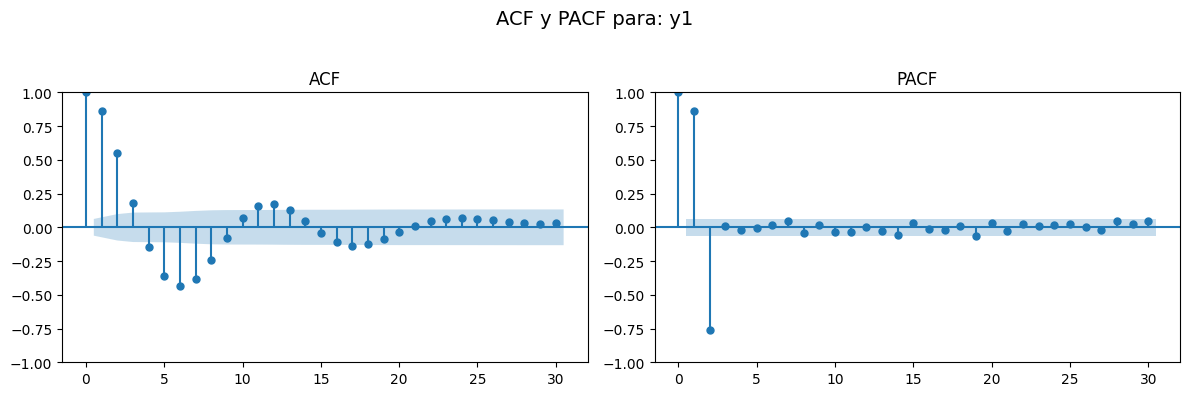

In [3]:
from timeseries import TimeSeriesAnalysis

variables = series.columns.tolist()
ts = TimeSeriesAnalysis()

variable = variables[0]
serie = series[variable]
ts.plot_acf_pacf(serie, variable_title=f'{variable}')

Viendo el correlograma vemos que la ACF parece decaer a cero geometricamente pero vemos valores significativamente distintos de cero en el lag 12. Sin embargo, la PACF se hace cero en el segundo lag. En tanto, el primer guess es un AR(2), vamos a partir de menos lags y vamos a ver si los ruidos parecen ser blancos.

In [ ]:
# Testeamos AR(1)
ts.fit_arima(serie, order = (1, 0, 0), sugerencia_tipo = 'AR')


Resumen del modelo ARIMA:

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1847.088
Date:                Sat, 19 Apr 2025   AIC                           3700.176
Time:                        20:56:01   BIC                           3714.899
Sample:                             0   HQIC                          3705.772
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1601      0.350     -0.457      0.648      -0.846       0.526
ar.L1          0.8613      0.016     55.395      0.000       0.831       0.892
sigma2         2.3512   

{'modelo': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x1b1052eef10>,
 'aic': np.float64(3700.1761152261947),
 'bic': np.float64(3714.899381063141),
 'ljungbox':         lb_stat      lb_pvalue      bp_stat      bp_pvalue
 1    428.479912   3.481260e-95   427.197038   6.621511e-95
 2    481.093428  3.403215e-105   479.600520  7.179105e-105
 3    500.523093  3.675434e-108   498.933230  8.125587e-108
 4    649.780089  2.600864e-139   647.296472  8.969539e-139
 5    889.072250  6.167410e-190   884.916932  4.890732e-189
 6   1105.902495  1.102145e-235  1100.015997  2.069419e-234
 7   1201.664713  3.082746e-255  1194.918076  8.868474e-254
 8   1215.735874  3.817077e-257  1208.848805  1.174490e-255
 9   1220.706507  4.105194e-257  1213.764870  1.294305e-255
 10  1262.734716  4.210303e-265  1255.289748  1.701028e-263
 11  1322.638546  5.870070e-277  1314.416382  3.482531e-275
 12  1368.180532  1.006791e-285  1359.322053  8.174274e-284
 13  1388.295495  5.101283e-289  1379.135894  4.79

Vemos que rechazamos la hipotesis nula de que no hay correlación entre los errores, necesitamos más estructura en el modelo. Probamos con el guess inicial de AR(2).

In [10]:
# Testeamos AR(2)
ts.fit_arima(serie, order = (2, 0, 0), sugerencia_tipo = 'AR')


Resumen del modelo ARIMA:

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1419.805
Date:                Sat, 19 Apr 2025   AIC                           2847.610
Time:                        21:09:06   BIC                           2867.241
Sample:                             0   HQIC                          2855.071
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1598      0.130     -1.225      0.220      -0.415       0.096
ar.L1          1.5148      0.022     70.000      0.000       1.472       1.557
ar.L2         -0.7572   

{'modelo': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x1b10761ea80>,
 'aic': np.float64(2847.609865268257),
 'bic': np.float64(2867.2408863841856),
 'ljungbox':       lb_stat  lb_pvalue    bp_stat  bp_pvalue
 1    0.093245   0.760092   0.092966   0.760440
 2    0.431821   0.805807   0.430190   0.806465
 3    0.460908   0.927392   0.459132   0.927774
 4    0.691040   0.952429   0.687886   0.952814
 5    1.665399   0.893230   1.655438   0.894465
 6    4.505145   0.608653   4.472511   0.613009
 7    4.869211   0.675920   4.833308   0.680297
 8    5.276156   0.727694   5.236191   0.732059
 9    5.335743   0.804114   5.295124   0.807860
 10   5.922984   0.821692   5.875333   0.825626
 11   6.149778   0.863186   6.099184   0.866665
 12   7.283509   0.838324   7.217074   0.842941
 13   8.074793   0.838694   7.996513   0.843827
 14   8.747910   0.846852   8.658882   0.852262
 15  10.533985   0.784876  10.414653   0.792879
 16  10.962671   0.811784  10.835639   0.819515
 17  15.285723

Ahí no rechazamos la hipótesis nula, asi que damos por sentado que un modelo que describe bien los datos es un AR(2) :)

### ANEXO Comparativa de Criterios de Información: AIC vs BIC vs HQIC

| Criterio | Fórmula | Penalización por complejidad | Ventaja principal | Desventaja principal | ¿Cuándo lo usarías? |
|----------|---------|------------------------------|-------------------|-----------------------|----------------------|
| **AIC** (Akaike Information Criterion) | $\text{AIC} = -2 \log L + 2k $ | Penaliza con $2k $ | Favorece modelos con buen **ajuste predictivo** | Tiende a **sobreajustar** en muestras grandes | Cuando querés **predecir bien**, incluso si el modelo es más complejo |
| **BIC** (Bayesian Information Criterion) | $\text{BIC} = -2 \log L + k \log(n) $ | Penaliza con $k \log(n) $ | Favorece **parsimony** (modelos simples) y es consistente | Puede **subajustar** en muestras pequeñas | Cuando tenés muchos datos y buscás el **modelo verdadero** |
| **HQIC** (Hannan–Quinn Information Criterion) | $\text{HQIC} = -2 \log L + 2k \log(\log(n)) $ | Penalización intermedia | Balancea entre ajuste y parsimony | Poco usado, menos conocido | Cuando querés un equilibrio entre AIC y BIC |

---

Notas:

- $\log L $: log-verosimilitud del modelo
- $k $: número de parámetros estimados
- $n $: número de observaciones

Siempre se **prefiere el modelo con menor valor del criterio**, pero los tres pueden dar recomendaciones distintas.


Notas sobre la clase de Ine. 

1. Test de hipótesis (p-value de E-views)

$H_0:$ NO HAY correlación entre los lags

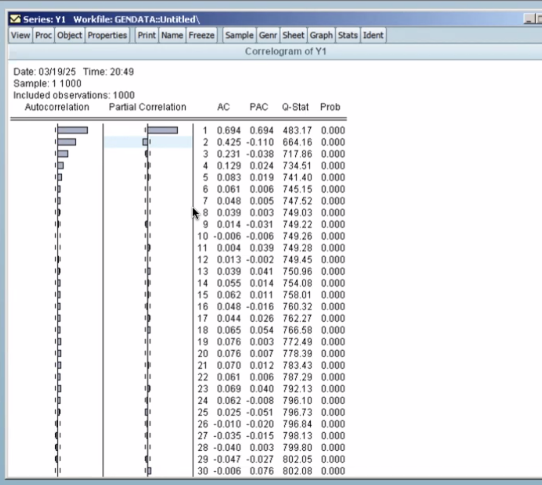

Esto nos dice que la primer autocorrelacion es signficativamente distinta de 0, el otro no sabemos. Testeamos AR(1) y despues AR(2).

¿Cómo descartamos los modelos? Miramos el correlograma de los residuos. Miramos la ultima columna y tratamos de ver si son independientes los lags entre si. Deseamos que los p-values sean lo más grandes posible.

Testeamos con AR(2): 

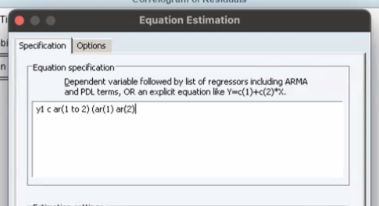

## HACER el resto de variables

Pero es la misma lógica:)

# Ejercicio 5

HACER, pero misma lógica que antes.

# Ejercicio 6

## Enunciado

Vamos a modelar y forecastear el PIB de USA. Para eso levantamos un csv con los datos del workfile de Eviews(*). Asumimos que ln(GNP) tiene tendencia lineal determinística. 

Responda:
1. ¿Cómo especificaría el modelo para el logaritmo del PIB? Estime una tendencia lineal para la muestra
2. Quite la tendencia a los datos del producto. ¿Qué tipo de serie tiene? 
3. Identifique y estime el proceso correcto
4. Compute un forecast dinámico para 2008Q1 en dadelante para la serie sin tendencia
5. Compute un forecast dinámico para 2008Q1 en adelante para la serie original
6. Calcule el RMSE, MAE y MAPE

(\*) Descargar en el siguiente link: https://docs.google.com/spreadsheets/d/1DdqBrBDO0xd3I0ieOd2MtamYL9hB2mS-kNF8njDp7_0/edit?usp=sharing



In [14]:
import pandas as pd
from timeseries import TimeSeriesAnalysis
from statsmodels.tsa.stattools import OLS
import numpy as np

# Seteamos el path donde está el dataset
adress = r'C:\Users\pnunezherrero\Desktop\TimeSeries\Datasets\dataset_ej6.xlsx'

# Leemos el dataset
df = pd.read_excel(adress, sheet_name='data')

# Vamos a estimar por OLS el modelo y_t = c + beta * t + e_t
variable_name = 'GNP'
variable_serie = df[variable_name]

# Creamos la variable t
df['t'] = np.arange(1, len(variable_serie) + 1)

# Definimos la variable independiente (X) y la dependiente (y)
X = df[['t']]
X = sm.add_constant(X)  # Agregamos la constante al modelo
y = variable_serie

# Estimamos el modelo OLS
model = OLS(y, X).fit()

# Imprimimos el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:              sáb., 19 abr. 2025   Prob (F-statistic):          5.14e-102
Time:                        21:44:34   Log-Likelihood:                 249.31
No. Observations:                  92   AIC:                            -494.6
Df Residuals:                      90   BIC:                            -489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9185      0.003   2606.029      0.0